In [86]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import keras
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [87]:
df = pd.read_csv("../input/google/google.csv",index_col = 0)

In [88]:
df.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2004-08-19,49.813286,51.835709,47.800831,49.982655,44871300,0,0.0
2004-08-20,50.316402,54.336334,50.062355,53.952770,22942800,0,0.0
2004-08-23,55.168217,56.528118,54.321388,54.495735,18342800,0,0.0
2004-08-24,55.412300,55.591629,51.591621,52.239193,15319700,0,0.0
2004-08-25,52.284027,53.798351,51.746044,52.802086,9232100,0,0.0


In [89]:
def make_data(df,win):
    k = 0
    x = []
    y = []
    while (k+win<len(df)-1):
        xa = df[k:k+win]
        ya = df[k+win+1]
        x.append(xa)
        y.append(ya)
        k+=1
    
    x = np.array(x)
    y = np.array(y)

    return x,y

In [90]:
def split_data(x,y):
    return train_test_split(x,y,test_size = 0.2,shuffle = False)

In [91]:
req_df = df['Open']
scaler = MinMaxScaler(feature_range= (0,1))
req_df = scaler.fit_transform(np.array(req_df).reshape(-1,1))

In [92]:
req_df.shape

(4102, 1)

In [93]:
win = 10
x,y = make_data(req_df,win)
train_x,test_x,train_y,test_y = split_data(x,y)
print(train_x.shape)
print(test_y.shape)
print(train_y.shape)
print(test_x.shape)

(3272, 10, 1)
(819, 1)
(3272, 1)
(819, 10, 1)


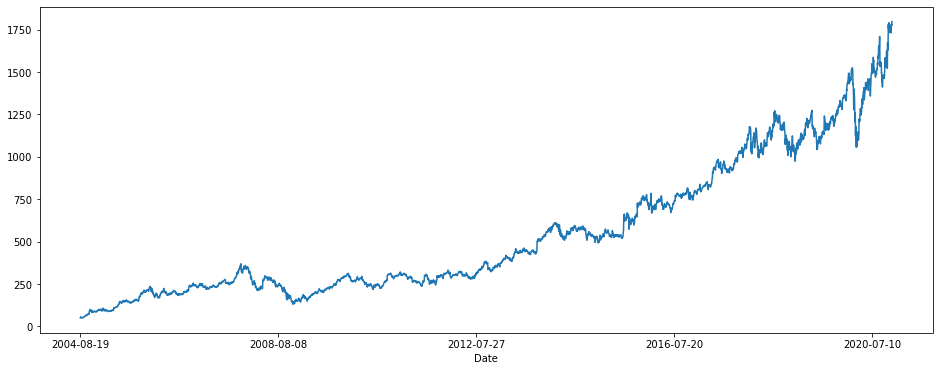

In [95]:
df['Open'].plot(figsize = (16,6))

In [96]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Input
import keras

In [97]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(win,1)))
model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [98]:
train_x = train_x.reshape(train_x.shape[0],win,1)
test_x = test_x.reshape(test_x.shape[0],win,1)

In [99]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, 10, 50)            10400     
_________________________________________________________________
dropout_6 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_20 (LSTM)               (None, 10, 50)            20200     
_________________________________________________________________
dropout_7 (Dropout)          (None, 10, 50)            0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [33]:
model.fit(train_x,train_y,batch_size = 32, epochs = 100,verbose = 1)

Epoch 1/100
103/103 [==============================] - 1s 8ms/step - loss: 0.0036
Epoch 2/100
103/103 [==============================] - 1s 7ms/step - loss: 9.4977e-05
Epoch 3/100
103/103 [==============================] - 1s 6ms/step - loss: 9.2143e-05
Epoch 4/100
103/103 [==============================] - 1s 6ms/step - loss: 8.9942e-05
Epoch 5/100
103/103 [==============================] - 1s 5ms/step - loss: 9.7369e-05
Epoch 6/100
103/103 [==============================] - 1s 7ms/step - loss: 9.4572e-05
Epoch 7/100
103/103 [==============================] - 1s 6ms/step - loss: 9.7706e-05
Epoch 8/100
103/103 [==============================] - 1s 5ms/step - loss: 9.8275e-05
Epoch 9/100
103/103 [==============================] - 1s 5ms/step - loss: 1.0199e-04
Epoch 10/100
103/103 [==============================] - 1s 5ms/step - loss: 9.7714e-05
Epoch 11/100
103/103 [==============================] - 1s 5ms/step - loss: 9.9596e-05
Epoch 12/100
103/103 [==============================] - 

103/103 [==============================] - 1s 5ms/step - loss: 3.5289e-05
Epoch 96/100
103/103 [==============================] - 1s 7ms/step - loss: 4.1409e-05
Epoch 97/100
103/103 [==============================] - 1s 6ms/step - loss: 3.4954e-05
Epoch 98/100
103/103 [==============================] - 1s 6ms/step - loss: 3.3355e-05
Epoch 99/100
103/103 [==============================] - 1s 6ms/step - loss: 3.4306e-05
Epoch 100/100
103/103 [==============================] - 1s 6ms/step - loss: 3.4753e-05


In [36]:
pred = model.predict(test_x)

In [39]:
pred = scaler.inverse_transform(pred)


array([[0.50993607],
       [0.50533264],
       [0.5036571 ],
       [0.50456061],
       [0.50728265],
       [0.5060017 ],
       [0.50505243],
       [0.50394872],
       [0.50428613],
       [0.50051758],
       [0.49785847],
       [0.49637734],
       [0.49955686],
       [0.50528688],
       [0.50228463],
       [0.50096937],
       [0.49998003],
       [0.50227891],
       [0.51006759],
       [0.51615215],
       [0.52071556],
       [0.51729587],
       [0.51901144],
       [0.51814793],
       [0.52455845],
       [0.53216414],
       [0.53216414],
       [0.52857286],
       [0.53642448],
       [0.53902642],
       [0.53908359],
       [0.53804853],
       [0.5388949 ],
       [0.53559528],
       [0.53756247],
       [0.53760822],
       [0.52644557],
       [0.52551344],
       [0.53216414],
       [0.54885663],
       [0.55160726],
       [0.55230491],
       [0.55344293],
       [0.55604487],
       [0.55624501],
       [0.56017939],
       [0.55919581],
       [0.561

In [75]:
org_data = np.array(df['Open'])
pred_x = np.arange(int(.8*len(df)),len(org_data)-2)

In [76]:
org_data.shape, pred_x.shape,pred.shape

((4102,), (819,), (819, 1))

In [77]:
import matplotlib.pyplot as plt

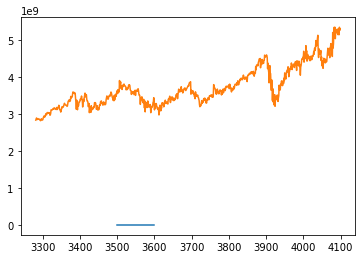

In [84]:
plt.plot([3500,3600],[500,2000])
plt.plot(pred_x,pred)

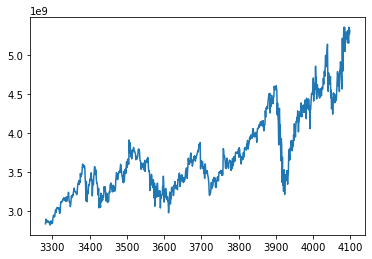

In [79]:
plt.plot(pred_x,pred)

In [85]:
mean_squared_error(pred,test_y)

1.408763585817228e+19